In [4]:
# Import the functions used in this project
import functions as pf
import awesome_functions as af

# Pretty display for notebooks
%matplotlib inline

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
submission = pd.read_csv("../asset/sample_submission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("submission  data : ", submission.shape)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle as pkl
slack_url = pkl.load(open("Slack_url/send_url.pickle", "rb"))

import xgboost

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_test = test.copy()
df_submission = submission.copy()

Train data :  (647054, 7)
Test  data :  (653646, 6)
submission  data :  (95674, 39)


In [25]:
from sklearn.metrics import log_loss

In [5]:
df_train_dd = pd.read_csv("Feature_matrix/df_train_dd_201807291831.csv")
df_test_dd = pd.read_csv("Feature_matrix/df_test_dd_201807291855.csv")

In [11]:
df_train_fl = pd.read_csv("Feature_matrix/df_train_fl_201807291845.csv")
df_test_fl = pd.read_csv("Feature_matrix/df_test_fl_201807291908.csv")

In [6]:
li_train_by_vn = []
for i in df_train_dd["TripType"].unique():
    tmp = df_train_dd[df_train_dd["TripType"] == i]
    li_train_by_vn.append(tmp)
    
length_train_by_triptype = []
triptype_li = []
for i in range(len(li_train_by_vn)):
    length_train_by_triptype.append(len(li_train_by_vn[i]))
    triptype_li.append(li_train_by_vn[i]["TripType"].unique()[0])

In [7]:
dict_len_by_tt = dict(zip(triptype_li, length_train_by_triptype))

In [8]:
from sklearn.naive_bayes import MultinomialNB
def fitNaiveBayesModel(X, y):
    return MultinomialNB().fit(X, y)
model_xgb = xgboost.XGBClassifier(n_estimators=100, max_depth=2)

In [9]:
def getGroupByDf(df):
    cols = [col for col in df.columns if col not in ["VisitNumber", "TripType"]]
    npsum = [np.sum for col in cols]
    agg_dict = dict(zip(cols, npsum))
    return df.groupby("TripType").agg(agg_dict).reset_index()

def getColsToFit(df, is_need_return = True):
    if is_need_return:
        return [col for col in df.columns if col not in ["VisitNumber", "TripType"]]
    return [col for col in df.columns if col not in ["VisitNumber", "TripType", "Return"]]

In [10]:
cmap = sns.light_palette("gray", as_cmap=True)

In [12]:
cols_fl = getColsToFit(df_train_fl, is_need_return = False)
cols_dd = getColsToFit(df_train_dd, is_need_return = False)

In [44]:
groupby_fl

,TripType,Return,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,...,1627.0,-1,8191.0,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,3,0,807,0,76,1,0,0,3,0,...,0,5,0,437,457,480,402,794,622,451
1,4,0,5,0,0,0,2,0,1,0,...,0,5,0,51,40,45,40,62,62,46
2,5,0,51,3,3,1,1,8,6,0,...,0,2568,0,584,628,671,638,751,742,579
3,6,0,16,0,0,0,1,1,0,0,...,0,3,0,138,128,162,136,226,303,184
4,7,2,66,4,2,0,0,3,2,0,...,0,27,0,799,780,807,746,877,843,900
5,8,1,0,39,3,2,0,32,4,3,...,0,84,0,1575,1598,1546,1525,1944,1984,1989
6,9,0,3,12,5,3,7,12,40,3,...,1,86,6,1067,1040,1168,1158,1565,1765,1701
7,12,0,7,0,0,0,0,0,4,0,...,0,4,0,22,21,18,17,36,81,74
8,14,0,2,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,2,0
9,15,0,53,4,0,1,4,1,59,0,...,0,22,0,90,96,116,128,178,208,162


In [13]:
groupby_fl = getGroupByDf(df_train_fl)

In [42]:
af.saveDataFrameToCsv(groupby_fl, "df_groupby_fl")

In [14]:
groupby_dd = getGroupByDf(df_train_dd)

In [15]:
def getNormalizedDf_2(df, cols):
    result = df.copy()
    result = result[cols]
    for col in result.columns:
        result[col] = round(result[col]/result[col].sum(), 3)
    return result

In [16]:
def getNormalizedDf(df, cols):
    result = df.copy()
    result = result[cols]
    for i in range(len(df)):
        triptype = df.loc[i]["TripType"]
        length = dict_len_by_tt[triptype]
        result.loc[i] = round(result.loc[i]/length, 2)
    return result

In [17]:
normalized_df = getNormalizedDf(groupby_dd, cols_dd)

In [18]:
heatmap_dd = pd.concat([groupby_dd["TripType"], normalized_df], axis = 1).set_index("TripType")

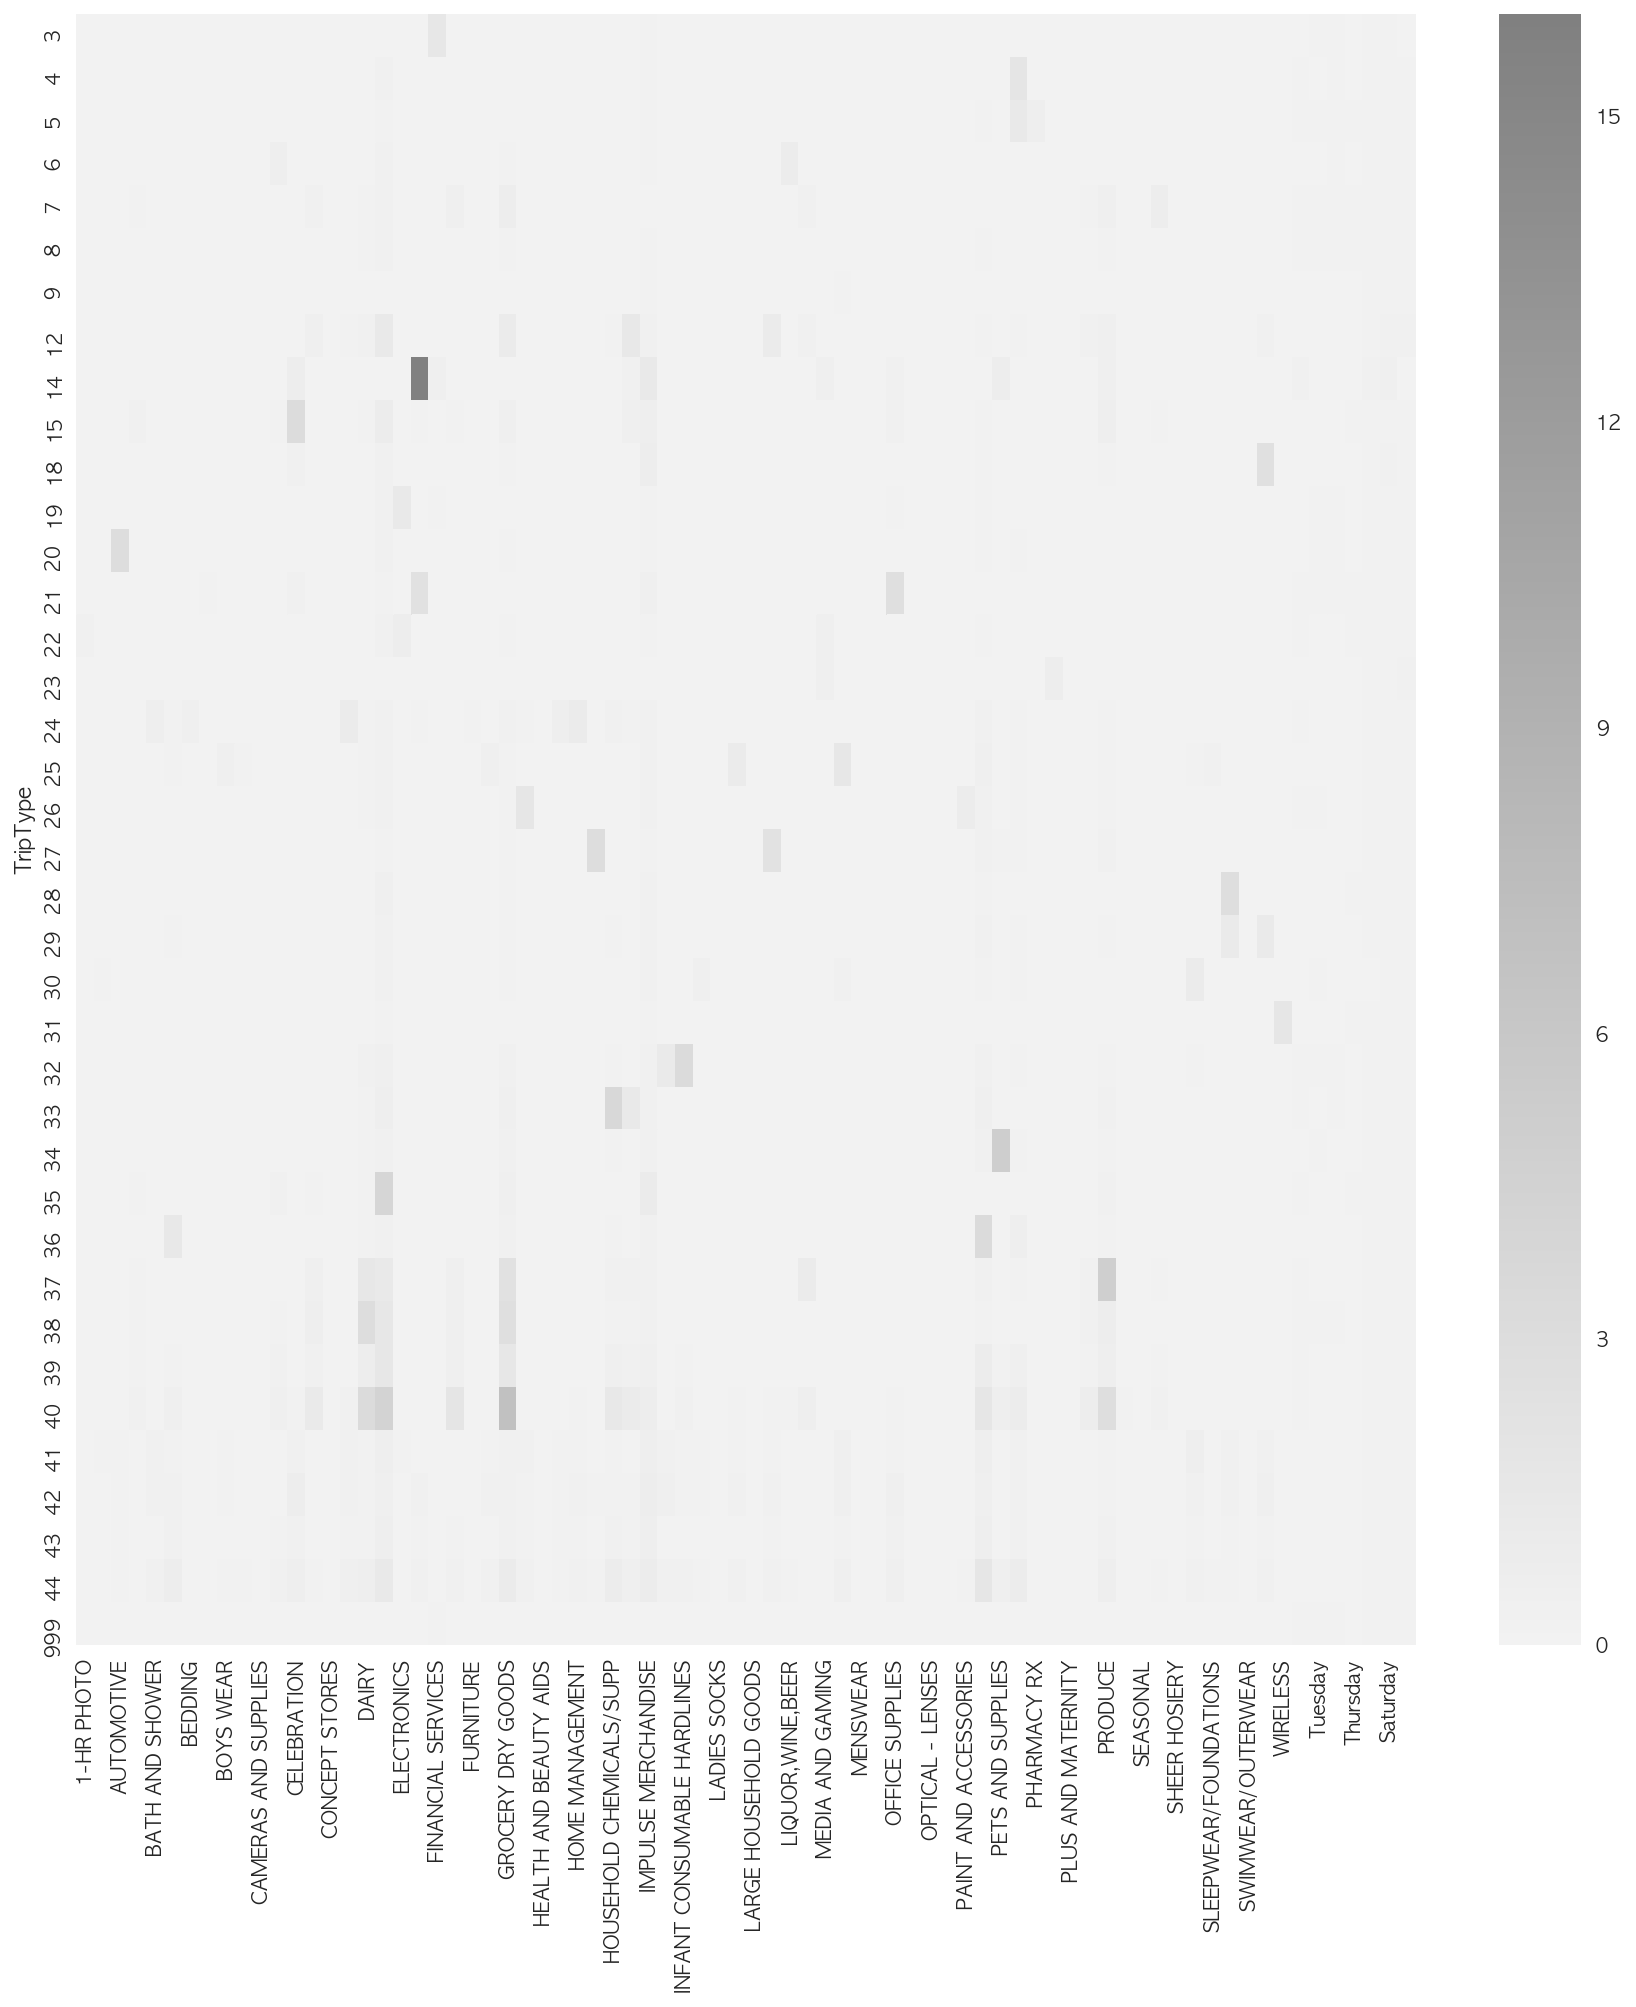

In [151]:
plt.figure(figsize=(15, 15))
sns.heatmap(heatmap_dd, cmap=cmap)
plt.show()

In [19]:
model_nb = fitNaiveBayesModel(groupby_fl[cols_fl], groupby_fl["TripType"])

In [20]:
y_pred = model_nb.predict(df_train_fl[cols_fl])

In [21]:
y_pred_proba = model_nb.predict_proba(df_train_fl[cols_fl])

In [22]:
af.getAccuracy(df_train_fl["TripType"], y_pred, len(df_train_dd))

##### Accuracy : 0.6007

In [24]:
log_loss(df_train_fl["TripType"], y_pred_proba)

1.7212676040136303

In [27]:
model_nb_dd = fitNaiveBayesModel(groupby_dd[cols_dd], groupby_dd["TripType"])

In [29]:
y_pred_dd = model_nb_dd.predict(df_train_dd[cols_dd])

In [30]:
y_pred_dd_proba = model_nb_dd.predict_proba(df_train_dd[cols_dd])

In [32]:
af.getAccuracy(df_train_dd["TripType"], y_pred_dd, len(df_train_dd))

##### Accuracy : 0.4549

In [31]:
log_loss(df_train_dd["TripType"], y_pred_dd_proba)

2.46610861875261

In [35]:
report_dd = classification_report(df_train_dd["TripType"], y_pred_dd)
report_fl = classification_report(df_train_fl["TripType"], y_pred)

In [40]:
compareClassificationReport(report_fl, report_dd)

,TripType,precision,recall,f1-score,support,model
0,3,0.87,0.96,0.91,3643,fl
1,3,0.79,0.90,0.84,3643,dd


,TripType,precision,recall,f1-score,support,model
2,4,0.67,0.76,0.71,346,fl
3,4,0.10,0.86,0.18,346,dd


,TripType,precision,recall,f1-score,support,model
4,5,0.70,0.77,0.74,4593,fl
5,5,0.86,0.45,0.59,4593,dd


,TripType,precision,recall,f1-score,support,model
6,6,0.58,0.80,0.67,1277,fl
7,6,0.48,0.86,0.61,1277,dd


,TripType,precision,recall,f1-score,support,model
8,7,0.69,0.75,0.72,5752,fl
9,7,0.60,0.66,0.63,5752,dd


,TripType,precision,recall,f1-score,support,model
10,8,0.70,0.45,0.55,12161,fl
11,8,0.58,0.09,0.15,12161,dd


,TripType,precision,recall,f1-score,support,model
12,9,0.75,0.35,0.48,9464,fl
13,9,0.55,0.04,0.08,9464,dd


,TripType,precision,recall,f1-score,support,model
14,12,0.37,0.57,0.44,269,fl
15,12,0.07,0.39,0.11,269,dd


,TripType,precision,recall,f1-score,support,model
16,14,0.75,0.75,0.75,4,fl
17,14,0.01,0.75,0.01,4,dd


,TripType,precision,recall,f1-score,support,model
18,15,0.39,0.72,0.51,978,fl
19,15,0.31,0.53,0.39,978,dd


,TripType,precision,recall,f1-score,support,model
20,18,0.42,0.64,0.51,549,fl
21,18,0.27,0.68,0.38,549,dd


,TripType,precision,recall,f1-score,support,model
22,19,0.62,0.57,0.59,375,fl
23,19,0.24,0.80,0.37,375,dd


,TripType,precision,recall,f1-score,support,model
24,20,0.41,0.66,0.50,637,fl
25,20,0.34,0.87,0.49,637,dd


,TripType,precision,recall,f1-score,support,model
26,21,0.41,0.79,0.54,641,fl
27,21,0.27,0.64,0.38,641,dd


,TripType,precision,recall,f1-score,support,model
28,22,0.55,0.68,0.61,928,fl
29,22,0.41,0.30,0.35,928,dd


,TripType,precision,recall,f1-score,support,model
30,23,0.82,0.43,0.57,139,fl
31,23,0.19,0.88,0.32,139,dd


,TripType,precision,recall,f1-score,support,model
32,24,0.56,0.63,0.59,2609,fl
33,24,0.49,0.68,0.57,2609,dd


,TripType,precision,recall,f1-score,support,model
34,25,0.60,0.69,0.64,3698,fl
35,25,0.54,0.75,0.63,3698,dd


,TripType,precision,recall,f1-score,support,model
36,26,0.43,0.60,0.50,503,fl
37,26,0.25,0.75,0.38,503,dd


,TripType,precision,recall,f1-score,support,model
38,27,0.49,0.69,0.57,785,fl
39,27,0.42,0.78,0.55,785,dd


,TripType,precision,recall,f1-score,support,model
40,28,0.47,0.65,0.54,492,fl
41,28,0.29,0.77,0.43,492,dd


,TripType,precision,recall,f1-score,support,model
42,29,0.65,0.69,0.67,433,fl
43,29,0.16,0.15,0.15,433,dd


,TripType,precision,recall,f1-score,support,model
44,30,0.54,0.53,0.53,1081,fl
45,30,0.31,0.72,0.44,1081,dd


,TripType,precision,recall,f1-score,support,model
46,31,0.69,0.81,0.75,594,fl
47,31,0.61,0.89,0.72,594,dd


,TripType,precision,recall,f1-score,support,model
48,32,0.57,0.74,0.65,1984,fl
49,32,0.58,0.81,0.68,1984,dd


,TripType,precision,recall,f1-score,support,model
50,33,0.33,0.75,0.46,1315,fl
51,33,0.33,0.73,0.46,1315,dd


,TripType,precision,recall,f1-score,support,model
52,34,0.40,0.73,0.52,719,fl
53,34,0.37,0.82,0.51,719,dd


,TripType,precision,recall,f1-score,support,model
54,35,0.36,0.71,0.48,2030,fl
55,35,0.25,0.74,0.37,2030,dd


,TripType,precision,recall,f1-score,support,model
56,36,0.39,0.76,0.52,3005,fl
57,36,0.38,0.73,0.50,3005,dd


,TripType,precision,recall,f1-score,support,model
58,37,0.45,0.77,0.57,2788,fl
59,37,0.40,0.74,0.52,2788,dd


,TripType,precision,recall,f1-score,support,model
60,38,0.45,0.75,0.56,2912,fl
61,38,0.30,0.66,0.41,2912,dd


,TripType,precision,recall,f1-score,support,model
62,39,0.61,0.30,0.40,9896,fl
63,39,0.53,0.15,0.23,9896,dd


,TripType,precision,recall,f1-score,support,model
64,40,0.67,0.57,0.61,6130,fl
65,40,0.66,0.36,0.47,6130,dd


,TripType,precision,recall,f1-score,support,model
66,41,0.57,0.41,0.48,583,fl
67,41,0.19,0.17,0.18,583,dd


,TripType,precision,recall,f1-score,support,model
68,42,0.60,0.35,0.44,1858,fl
69,42,0.50,0.12,0.19,1858,dd


,TripType,precision,recall,f1-score,support,model
70,43,0.49,0.28,0.35,872,fl
71,43,0.14,0.11,0.12,872,dd


,TripType,precision,recall,f1-score,support,model
72,44,0.51,0.44,0.48,1187,fl
73,44,0.33,0.24,0.28,1187,dd


,TripType,precision,recall,f1-score,support,model
74,999,0.91,0.85,0.88,8444,fl
75,999,0.78,0.75,0.77,8444,dd


,TripType,precision,recall,f1-score,support,model
76,total,0.64,0.60,0.59,95674,fl
77,total,0.54,0.45,0.42,95674,dd


,TripType,precision,recall,f1-score,support,model
0,3,0.87,0.96,0.91,3643,fl
1,3,0.79,0.90,0.84,3643,dd
2,4,0.67,0.76,0.71,346,fl
3,4,0.10,0.86,0.18,346,dd
4,5,0.70,0.77,0.74,4593,fl
5,5,0.86,0.45,0.59,4593,dd
6,6,0.58,0.80,0.67,1277,fl
7,6,0.48,0.86,0.61,1277,dd
8,7,0.69,0.75,0.72,5752,fl
9,7,0.60,0.66,0.63,5752,dd


In [48]:
df_train_dd.loc[0]["TripType"].sum()

999

In [60]:
cols_dd_wto_return = [col for col in cols_dd if col != "Return"]

In [61]:
len(cols_dd), len(cols_dd_wto_return)

(76, 76)

In [57]:
scancount_li = np.zeros(len(df_train_dd))
for i in list(df_train_dd.index):
    scancount_li[i] = df_train_dd.loc[i][cols_dd].sum()
    if (i % 5000) == 0:    
        print(str(i) + "명 진행됨.")

0명 진행됨.
5000명 진행됨.
10000명 진행됨.
15000명 진행됨.
20000명 진행됨.
25000명 진행됨.
30000명 진행됨.
35000명 진행됨.
40000명 진행됨.
45000명 진행됨.
50000명 진행됨.
55000명 진행됨.
60000명 진행됨.
65000명 진행됨.
70000명 진행됨.
75000명 진행됨.
80000명 진행됨.
85000명 진행됨.
90000명 진행됨.
95000명 진행됨.


In [66]:
scancount_li = scancount_li - 1

In [67]:
scancount_li.max()

311.0

In [68]:
df_train_dd["ScanCount"] = scancount_li

In [71]:
df_train_dd["ScanCount"] = df_train_dd["ScanCount"].astype(int)

In [80]:
should_remove_cols = ['VisitNumber', 'TripType', 'Return', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [81]:
cols_to_divide_sc = [col for col in df_train_dd.columns if col not in should_remove_cols]

In [82]:
tmp_df = df_train_dd[cols_to_divide_sc].copy()

In [38]:
def compareClassificationReport(report1, report2):
    """
        classification_report 두개를 비교 분석하기 용이하게 DF을 만들어서 반환한다.
        report1 : classification_report
        report2 : classification_report
        set_trip_type_as_index : triptype을 인덱스로한 df를 원하는지 넣어준다. default는 True
    """
    report1_df, cols = __preproccessToMakeDf(report1)
    report2_df, cols = __preproccessToMakeDf(report2)
    li = np.zeros(39 * 2 * 6).astype(str).reshape(39 * 2, 6)
    cols.append("model")
    for idx in range(len(li)):
        if idx % 2 == 0:
            tmp = list(report1_df[idx//2])
            tmp.append("fl")
            li[idx] = np.array(tmp)
        else:
            tmp = list(report2_df[idx//2])
            tmp.append("dd")
            li[idx] = np.array(tmp)
    df_report = pd.DataFrame(li, columns=cols)
    for tt in df_report["TripType"].unique():
        display(df_report[df_report["TripType"] == tt])
    return df_report

def __preproccessToMakeDf(report):
    result = [li for li in report.strip().split(" ") if li != ""]
    cols = [rlt.split("\n")[0] for rlt in result[:4]]
    cols.insert(0, "TripType")
    data = [rlt.split("\n")[0] for rlt in result[4:] if rlt != "/"]
    data = np.array(data).reshape(39, 5)
    return data, cols